In [ ]:
# google colab configurations 
# these might change
DATA_GENERATION = '13kwW8C01etWsqTYoE2eeFlD4Ft9YVhrw'
DATA_GENERATION_FILE = 'datageneration.py'

HELPERS = '1zskLM0-ZtEQYVI7zvd2ePqtkTOkJmVIL'
HELPERS_FILE = 'helpers.py'

EXPERIMENT = '1OrYHcTvUXHOrg-86_6oWaN2muDpuzn9a'
EXPERIMENT_FILE = 'experiment.py'

NETWORK = '1iFbCIY8IMaqO4I8mu2J7ie7UDJsLGtRv'
NETWORK_FILE = 'networks.py'

CONFIG = '14OF6o1luI8u10Nq96FLBP1M1k-VvQKq-'
CONFIG_FILE ='config.json'


google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    datageneration = drive.CreateFile({'id':DATA_GENERATION})
    datageneration.GetContentFile(DATA_GENERATION_FILE)
    

    helpers = drive.CreateFile({'id':HELPERS})
    helpers.GetContentFile(HELPERS_FILE)

    network = drive.CreateFile({'id':NETWORK})
    network.GetContentFile(NETWORK_FILE)

    experiment = drive.CreateFile({'id':EXPERIMENT})
    experiment.GetContentFile(EXPERIMENT_FILE)

    json = drive.CreateFile({'id':CONFIG})
    json.GetContentFile(CONFIG_FILE)


In [0]:
# custom imports
from experiment import Experiment
from datageneration import DataGenerator
from helpers import Helper
# torch imports
from torch.utils import data
import torch

# import utils
import json
from datetime import date
import os

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

with open('configs/config.json') as f:
    file = f.read()
    conf = json.loads(file)

In [3]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    conf['default']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')

Training on GPU!


## Generating a dataset

In [0]:
datagenerator = DataGenerator(**conf[MODEL_PARAMS]['data_gen_params'])
x_values, func_x = datagenerator.generate_curves()
func_x = Helper.list_np_to_sensor(func_x)
x_values = x_values.repeat(func_x.shape[0], 1, 1)

In [0]:
train_len = int(x_values.shape[0] * conf[MODEL_PARAMS]['train_share'])
traindata = data.TensorDataset(x_values[:train_len], func_x[:train_len])
trainloader = data.DataLoader(traindata, batch_size=100)
validata = data.TensorDataset(x_values[train_len:], func_x[train_len:])
valiloader = data.DataLoader(validata, batch_size=1)

In [0]:
# creating an instance of to orchestrate the training
trainer = Experiment(**conf[MODEL_PARAMS]['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 1.5160795450210571
 Validation loss after 0 equals 1.6398960769176483


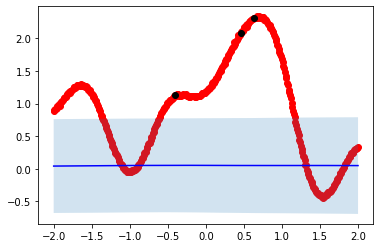

  2%|▏         | 4992/200000 [00:23<14:35, 222.65it/s]

Mean loss at epoch 5000 : 0.6323422789573669
 Validation loss after 5000 equals 1.983326780796051


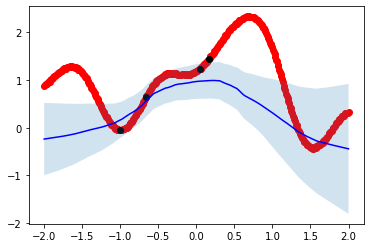

  5%|▍         | 9989/200000 [00:46<14:49, 213.69it/s]

Mean loss at epoch 10000 : 0.5085152983665466
 Validation loss after 10000 equals 2.026612716913223


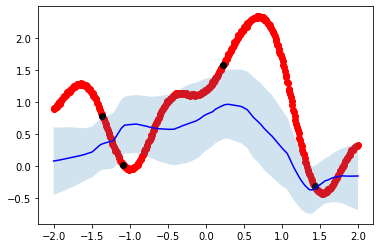

  7%|▋         | 14987/200000 [01:09<13:54, 221.67it/s]

Mean loss at epoch 15000 : 0.29875388741493225
 Validation loss after 15000 equals 1.2501676857471467


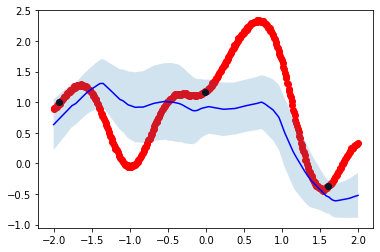

 10%|▉         | 19987/200000 [01:32<13:25, 223.55it/s]

Mean loss at epoch 20000 : 0.6134176254272461
 Validation loss after 20000 equals 1.3488482713699341


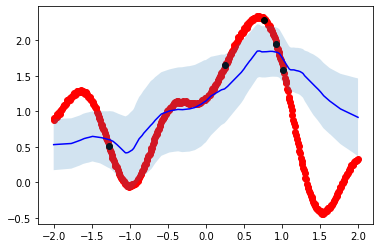

 12%|█▏        | 24987/200000 [01:55<13:14, 220.38it/s]

Mean loss at epoch 25000 : 0.48887208104133606
 Validation loss after 25000 equals 1.2525247573852538


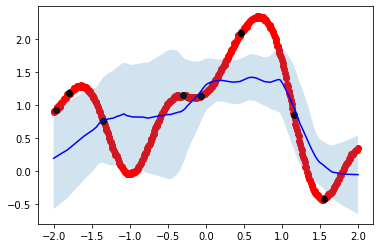

 15%|█▍        | 29982/200000 [02:17<12:27, 227.38it/s]

Mean loss at epoch 30000 : 0.30136001110076904
 Validation loss after 30000 equals 1.5007448881864547


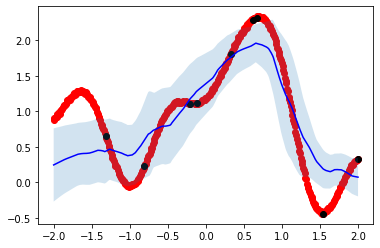

 17%|█▋        | 34978/200000 [02:40<12:17, 223.62it/s]

Mean loss at epoch 35000 : 0.4303627908229828
 Validation loss after 35000 equals 1.336563265323639


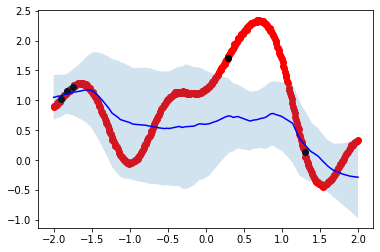

 20%|█▉        | 39983/200000 [03:02<11:28, 232.49it/s]

Mean loss at epoch 40000 : 0.09191514551639557
 Validation loss after 40000 equals 1.6322390019893647


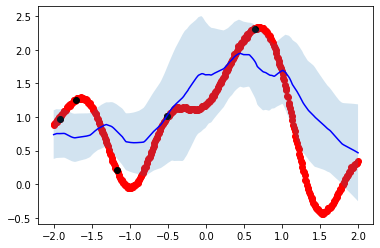

 22%|██▏       | 44996/200000 [03:25<11:39, 221.59it/s]

Mean loss at epoch 45000 : 0.22621478140354156
 Validation loss after 45000 equals 2.217863804101944


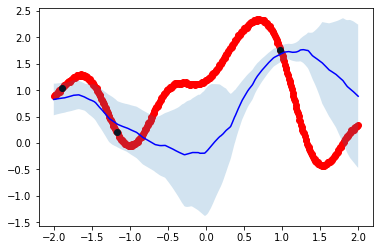

 25%|██▍       | 49988/200000 [03:47<11:13, 222.87it/s]

Mean loss at epoch 50000 : 0.8358107805252075
 Validation loss after 50000 equals 1.2276045233011246


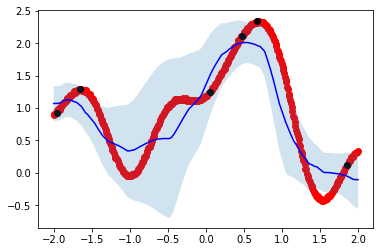

 27%|██▋       | 54990/200000 [04:09<10:30, 229.99it/s]

Mean loss at epoch 55000 : 0.4822309911251068
 Validation loss after 55000 equals 1.7178579330444337


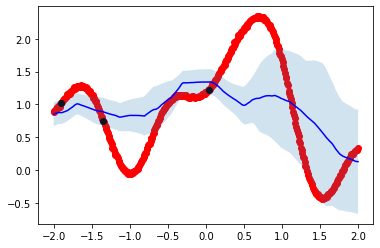

 30%|██▉       | 59991/200000 [04:32<10:04, 231.75it/s]

Mean loss at epoch 60000 : -0.08569285273551941
 Validation loss after 60000 equals 1.827958345413208


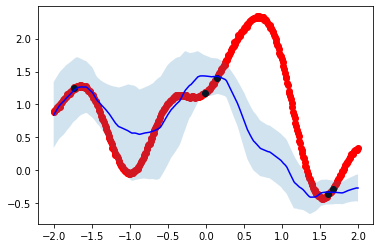

 32%|███▏      | 64980/200000 [04:54<09:55, 226.77it/s]

Mean loss at epoch 65000 : 0.6435571908950806
 Validation loss after 65000 equals 1.6984996914863586


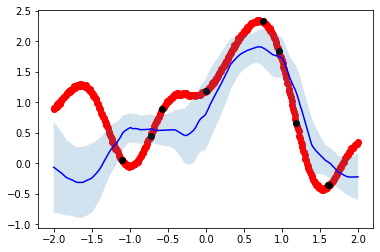

 35%|███▍      | 69981/200000 [05:16<09:40, 223.89it/s]

Mean loss at epoch 70000 : 0.27391937375068665
 Validation loss after 70000 equals 1.667580282688141


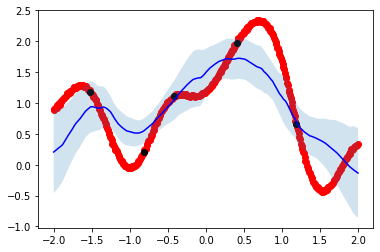

 37%|███▋      | 74995/200000 [05:39<09:22, 222.25it/s]

Mean loss at epoch 75000 : 0.07994413375854492
 Validation loss after 75000 equals 1.9636950135231017


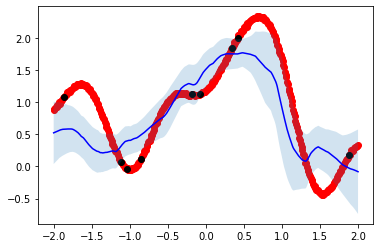

 40%|███▉      | 79997/200000 [06:02<09:03, 220.94it/s]

Mean loss at epoch 80000 : 0.17083273828029633
 Validation loss after 80000 equals 1.9030938565731048


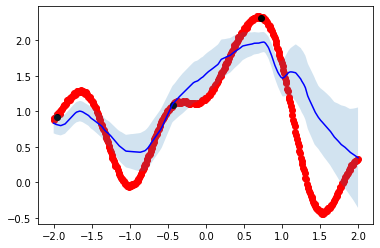

 42%|████▏     | 84995/200000 [06:24<08:19, 230.09it/s]

Mean loss at epoch 85000 : 0.711016833782196
 Validation loss after 85000 equals 1.5613400742411614


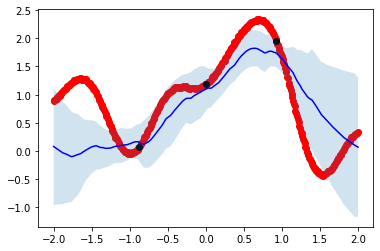

 45%|████▍     | 89999/200000 [06:47<08:16, 221.47it/s]

Mean loss at epoch 90000 : -0.05033710226416588
 Validation loss after 90000 equals 1.8941601395606995


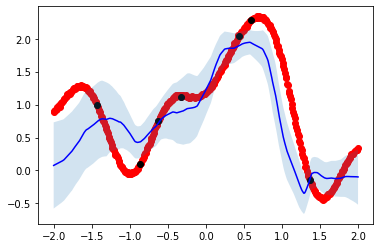

 47%|████▋     | 94982/200000 [07:09<07:41, 227.73it/s]

Mean loss at epoch 95000 : 0.2621232867240906
 Validation loss after 95000 equals 2.2791216403245924


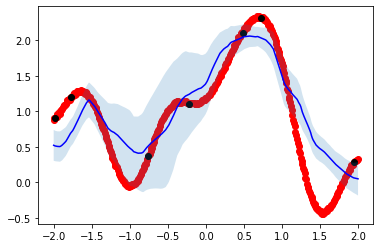

 50%|████▉     | 99988/200000 [07:32<07:20, 227.29it/s]

Mean loss at epoch 100000 : 0.002033245749771595
 Validation loss after 100000 equals 1.5487493455410004


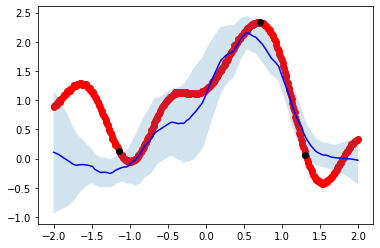

 52%|█████▎    | 105000/200000 [07:54<06:45, 234.39it/s]

Mean loss at epoch 105000 : -0.052438005805015564
 Validation loss after 105000 equals 1.530166459083557


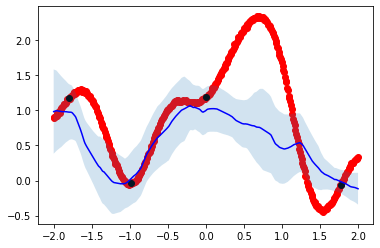

 55%|█████▍    | 109979/200000 [08:16<06:25, 233.59it/s]

Mean loss at epoch 110000 : 0.4063950181007385
 Validation loss after 110000 equals 2.1004467457532883


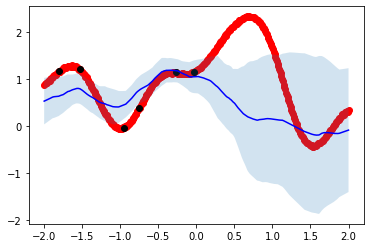

 57%|█████▋    | 114997/200000 [08:38<06:09, 230.26it/s]

Mean loss at epoch 115000 : -0.04569901525974274
 Validation loss after 115000 equals 2.438821887969971


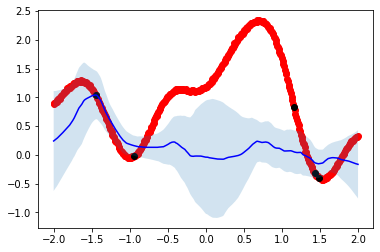

 60%|█████▉    | 119995/200000 [08:59<05:47, 230.40it/s]

Mean loss at epoch 120000 : -0.019418863579630852
 Validation loss after 120000 equals 2.0042058914899825


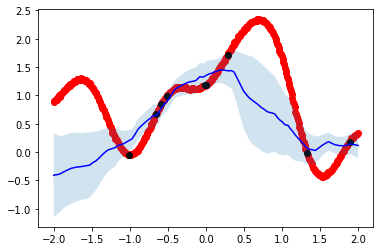

 62%|██████▏   | 124979/200000 [09:21<05:30, 227.29it/s]

Mean loss at epoch 125000 : -0.1405506730079651
 Validation loss after 125000 equals 1.276080033183098


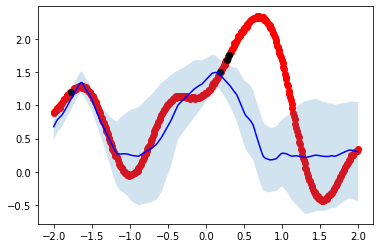

 65%|██████▍   | 129989/200000 [09:43<05:01, 231.94it/s]

Mean loss at epoch 130000 : 0.06545645743608475
 Validation loss after 130000 equals 2.2489563316106795


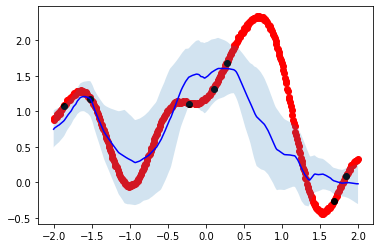

 67%|██████▋   | 134998/200000 [10:06<04:45, 227.61it/s]

Mean loss at epoch 135000 : 0.15817764401435852
 Validation loss after 135000 equals 2.004422163963318


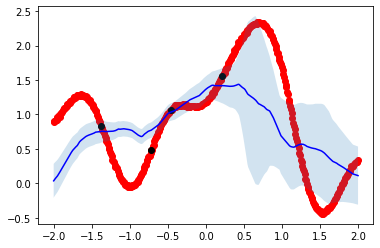

 70%|██████▉   | 139994/200000 [10:27<04:20, 230.24it/s]

Mean loss at epoch 140000 : 0.05558943375945091
 Validation loss after 140000 equals 2.455419072508812


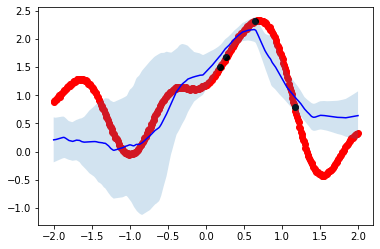

 72%|███████▏  | 144984/200000 [10:50<04:04, 224.81it/s]

Mean loss at epoch 145000 : 0.3361027240753174
 Validation loss after 145000 equals 1.0711985141038896


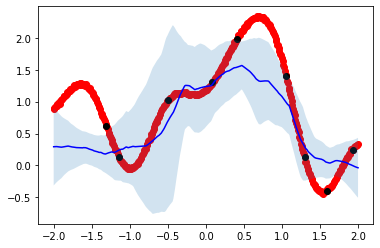

 75%|███████▍  | 149989/200000 [11:11<03:34, 233.22it/s]

Mean loss at epoch 150000 : -0.14808788895606995
 Validation loss after 150000 equals 1.5682699233293533


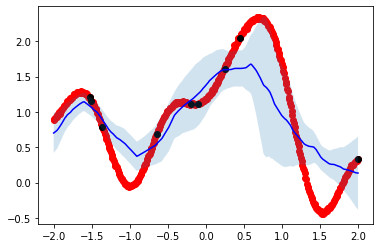

 77%|███████▋  | 154992/200000 [11:33<03:14, 231.94it/s]

Mean loss at epoch 155000 : -0.06567557901144028
 Validation loss after 155000 equals 4.118740212917328


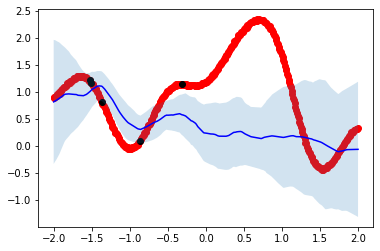

 80%|███████▉  | 159992/200000 [11:55<02:57, 225.76it/s]

Mean loss at epoch 160000 : -0.031468965113162994
 Validation loss after 160000 equals 2.3464304842054844


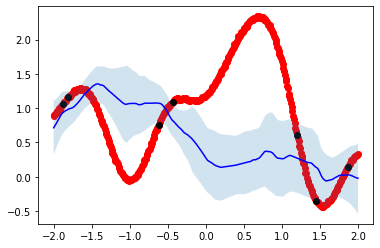

 82%|████████▎ | 165000/200000 [12:17<02:29, 233.57it/s]

Mean loss at epoch 165000 : 0.2688148617744446
 Validation loss after 165000 equals 1.6381451666355134


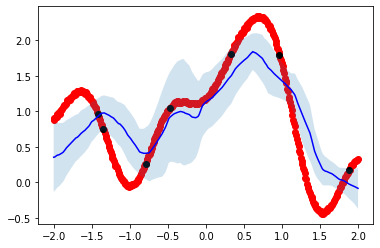

 85%|████████▍ | 169987/200000 [12:39<02:07, 235.37it/s]

Mean loss at epoch 170000 : 0.12366188317537308
 Validation loss after 170000 equals 2.358598047494888


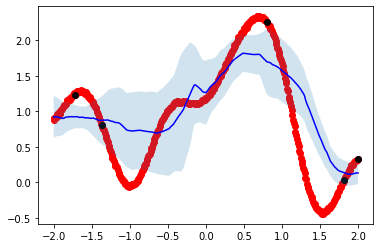

 87%|████████▋ | 174998/200000 [13:01<01:50, 226.98it/s]

Mean loss at epoch 175000 : 0.4430406391620636
 Validation loss after 175000 equals 2.207093685865402


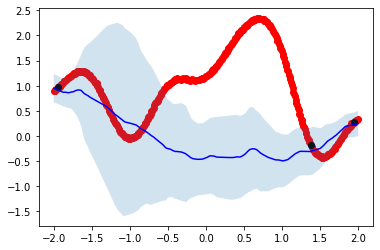

 90%|████████▉ | 179987/200000 [13:22<01:25, 233.89it/s]

Mean loss at epoch 180000 : 0.28481999039649963
 Validation loss after 180000 equals 1.8901118129491805


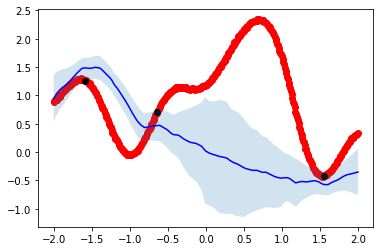

 92%|█████████▏| 184978/200000 [13:44<01:03, 235.18it/s]

Mean loss at epoch 185000 : 0.0479399748146534
 Validation loss after 185000 equals 1.5197152614593505


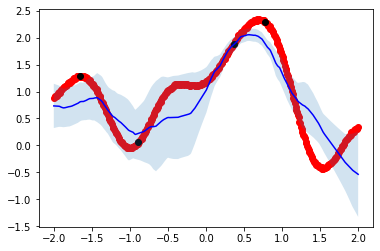

 95%|█████████▍| 189987/200000 [14:05<00:42, 234.37it/s]

Mean loss at epoch 190000 : -0.379133015871048
 Validation loss after 190000 equals 2.059978312253952


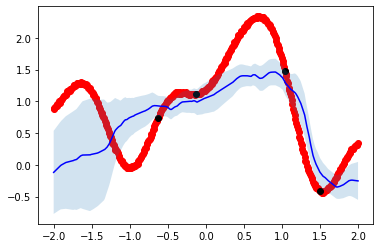

 97%|█████████▋| 194984/200000 [14:27<00:22, 221.89it/s]

Mean loss at epoch 195000 : 0.17199209332466125
 Validation loss after 195000 equals 1.2735427021980286


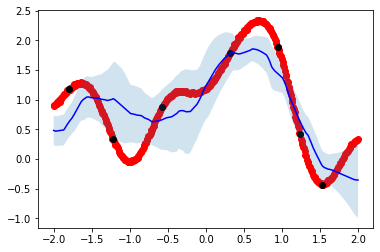

100%|██████████| 200000/200000 [14:48<00:00, 225.04it/s]


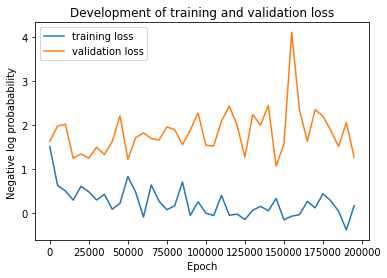

In [7]:
model_weights = trainer.run_training(trainloader, valiloader, plotting=True)

 ## Sandbox - testing the individual parts of the function

### Kernel function
Expanding the dimesions of the tensors allows us substract each point pairwise
This being a 1-D use case we simply substract each of the data points and get an n by n matrix for each layer.

In [0]:
batch_size = 64
num_points = 10
dimx = 1
dimy = 1
rdim = 20
hdim = 20
x = Helper.scale_shift_uniform(-2,2,batch_size,num_points,dimx)
y = Helper.scale_shift_uniform(-2,2,batch_size,num_points,dimy)

x_stacked  = x.view(batch_size*num_points,-1)
y_stacked  = y.view(batch_size*num_points,-1)
encoder = Encoder(1,1,hdim,[hdim,hdim,rdim])
r  = encoder.forward(x_stacked,y_stacked)
r = r.view(batch_size,num_points,-1)
r_aggregate = aggregate(r).unsqueeze(1)
print(r_aggregate.shape)
r_aggregate = r_aggregate.repeat(1,num_points,1)
print(r_aggregate.shape)

hdim = 128
outdim = 2
decoder = Decoder(dimx,rdim,outdim,[hdim,hdim,hdim])

r_stacked = r_aggregate.view(batch_size*num_points,-1)
print(r_stacked.shape)
dist_params = decoder.forward(x_stacked, r_stacked).view(batch_size,num_points,-1)

mu = dist_params[:,:,0]
sigma = torch.diag_embed(dist_params[:,:,1])
sigma_test = torch.ones(10).unsqueeze(0).repeat(64,1)



NameError: name 'Encoder' is not defined

In [0]:
torch.Size([2, 7, 1])

In [0]:
import numpy as np
from torch.nn.functional import softplus
from torch.distributions import Normal


sigma = torch.Tensor(np.array([[[3],[4]],[[1],[2]]]))
mu    = torch.Tensor(np.array([[[0],[0]],[[0],[0]]]))

In [0]:
sigma = 0.1 + 0.9 * softplus(sigma)

In [0]:
Normal(mu, sigma).sample()

tensor([[[-0.8861],
         [ 1.9055]],

        [[ 1.9248],
         [ 1.4061]]])

In [0]:
import tqdm
for i in tqdm.tqdm(range(10000)):
  pass

100%|██████████| 10000/10000 [00:00<00:00, 2057241.51it/s]
